In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/cryptocurrency/coin_Bitcoin.csv
./input/cryptocurrency/coin_Ethereum.csv


In [2]:
df = None
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        
        if filename not in ["coin_Bitcoin.csv", "coin_Ethereum.csv"]:
            continue
    
        raw = pd.read_csv(os.path.join(dirname, filename))
        
        try:
            df = pd.concat([df, pd.DataFrame.from_records(raw)])
        except:
            df = raw
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [3]:
# clean the data, drop the nonsensical headers
df["Increase"] = df["Close"] > df["Open"]
df["Increase"] = df["Increase"].astype(int)
print(df["Increase"])

df["Change"] =  ( df["Close"] - df["Open"] ) / df["Open"]
print(df)

0       1
1       0
2       0
3       0
4       0
       ..
2155    1
2156    1
2157    1
2158    0
2159    1
Name: Increase, Length: 5151, dtype: int32
       SNo      Name Symbol                 Date         High          Low  \
0        1   Bitcoin    BTC  2013-04-29 23:59:59   147.488007   134.000000   
1        2   Bitcoin    BTC  2013-04-30 23:59:59   146.929993   134.050003   
2        3   Bitcoin    BTC  2013-05-01 23:59:59   139.889999   107.720001   
3        4   Bitcoin    BTC  2013-05-02 23:59:59   125.599998    92.281898   
4        5   Bitcoin    BTC  2013-05-03 23:59:59   108.127998    79.099998   
...    ...       ...    ...                  ...          ...          ...   
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH  2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH  2021-07-05 23:59:59  2321.922836  2163

In [4]:
train_data = df.drop(labels=["SNo", "Name", "Symbol", "Date"], axis=1)
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Change
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,0.075094
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,-0.034722
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,-0.158345
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,-0.095979
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,-0.080000
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,0.019028
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,0.035000
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,0.042745
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,-0.053120


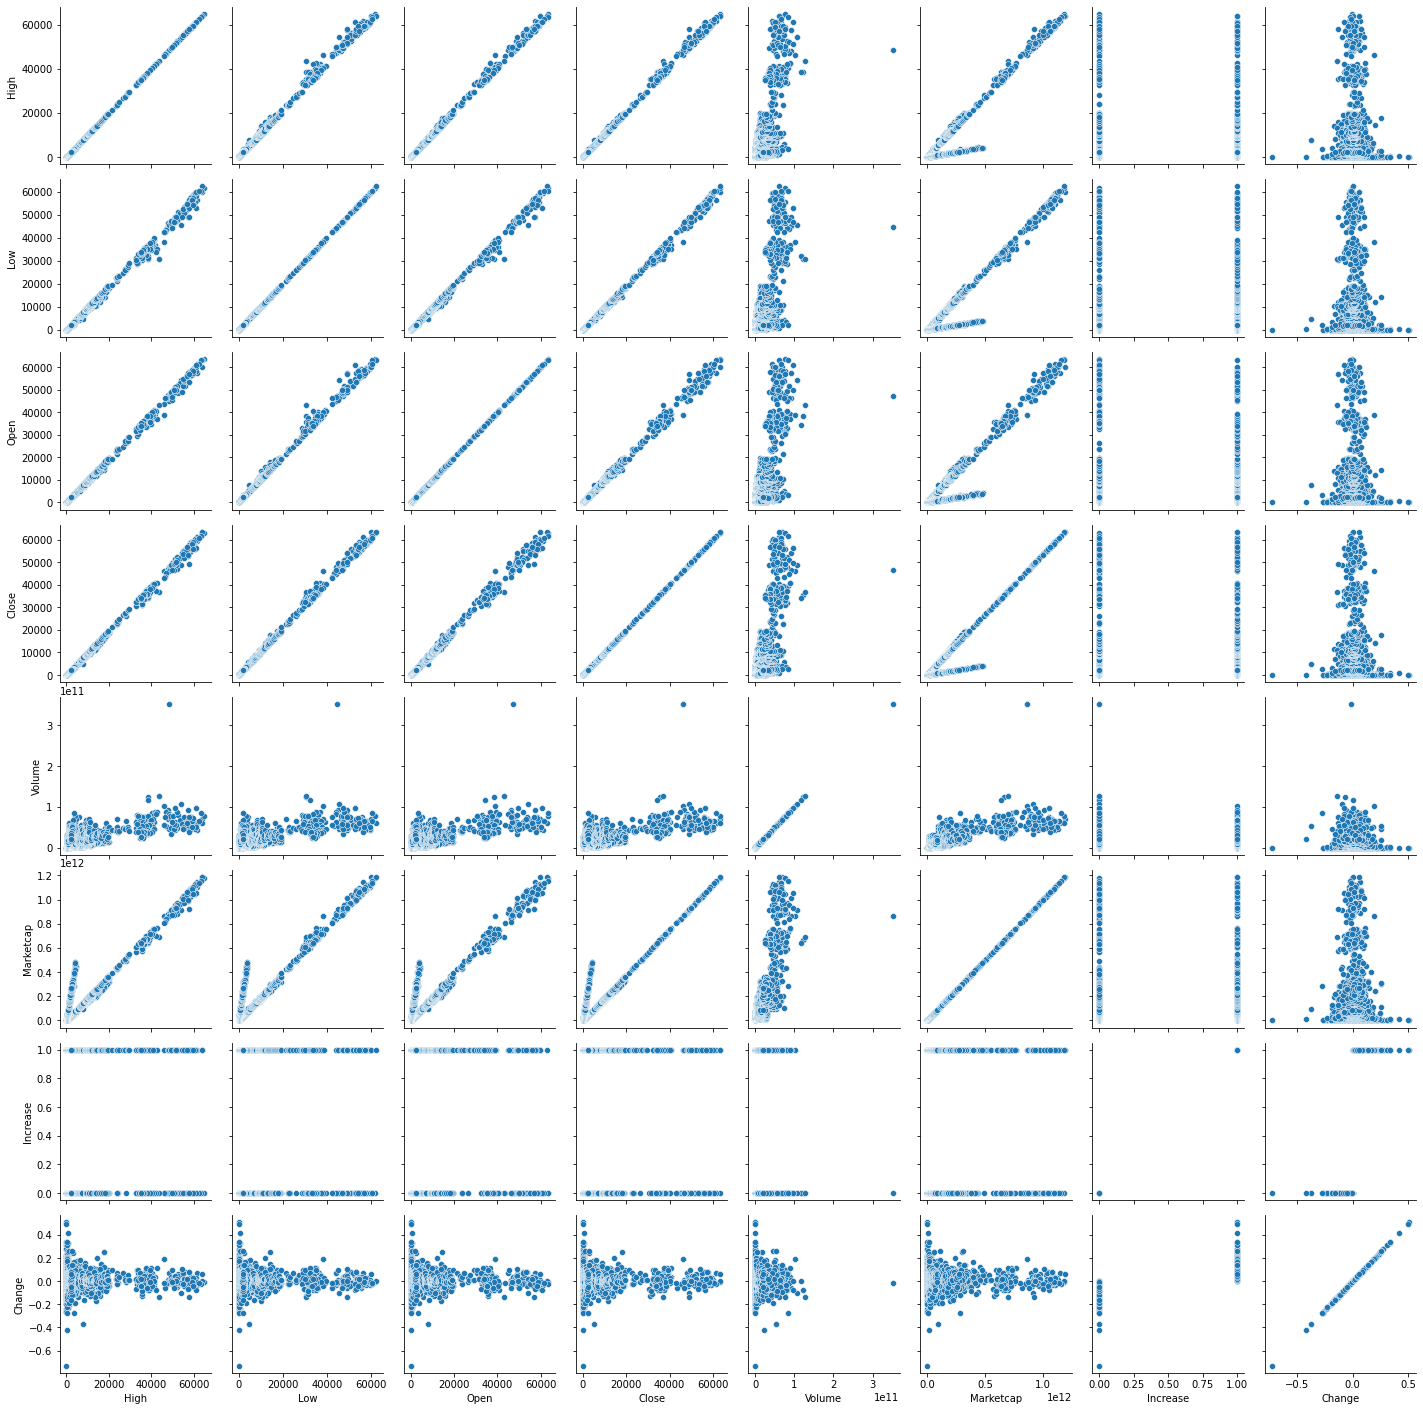

In [5]:
import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)

(array([3.53430578e+02, 1.53286476e+03, 2.58747168e+03, 8.51010592e+03,
       5.70868354e+09, 3.04166426e+11, 7.21629008e-01]), array([7.58739907e-79, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.95610084e-01]))


<AxesSubplot:>

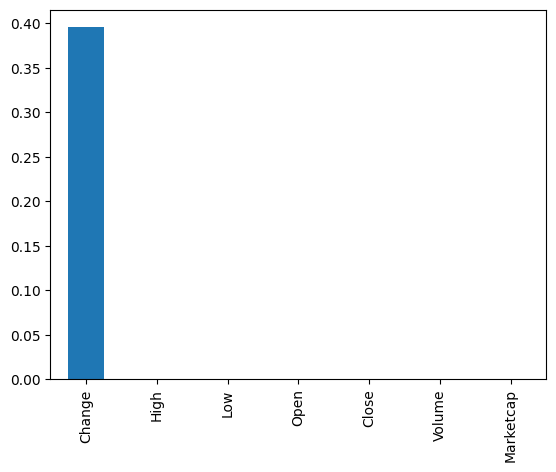

In [6]:
# here use chi2 if features were acceptable
from sklearn.feature_selection import chi2

_train_labels = train_data["Increase"]
_train_data = train_data.drop(labels=["Increase"], axis=1)
_train_data["Change"] = abs(_train_data["Change"]) # 


chi_scores = chi2(_train_data, _train_labels)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index=_train_data.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()


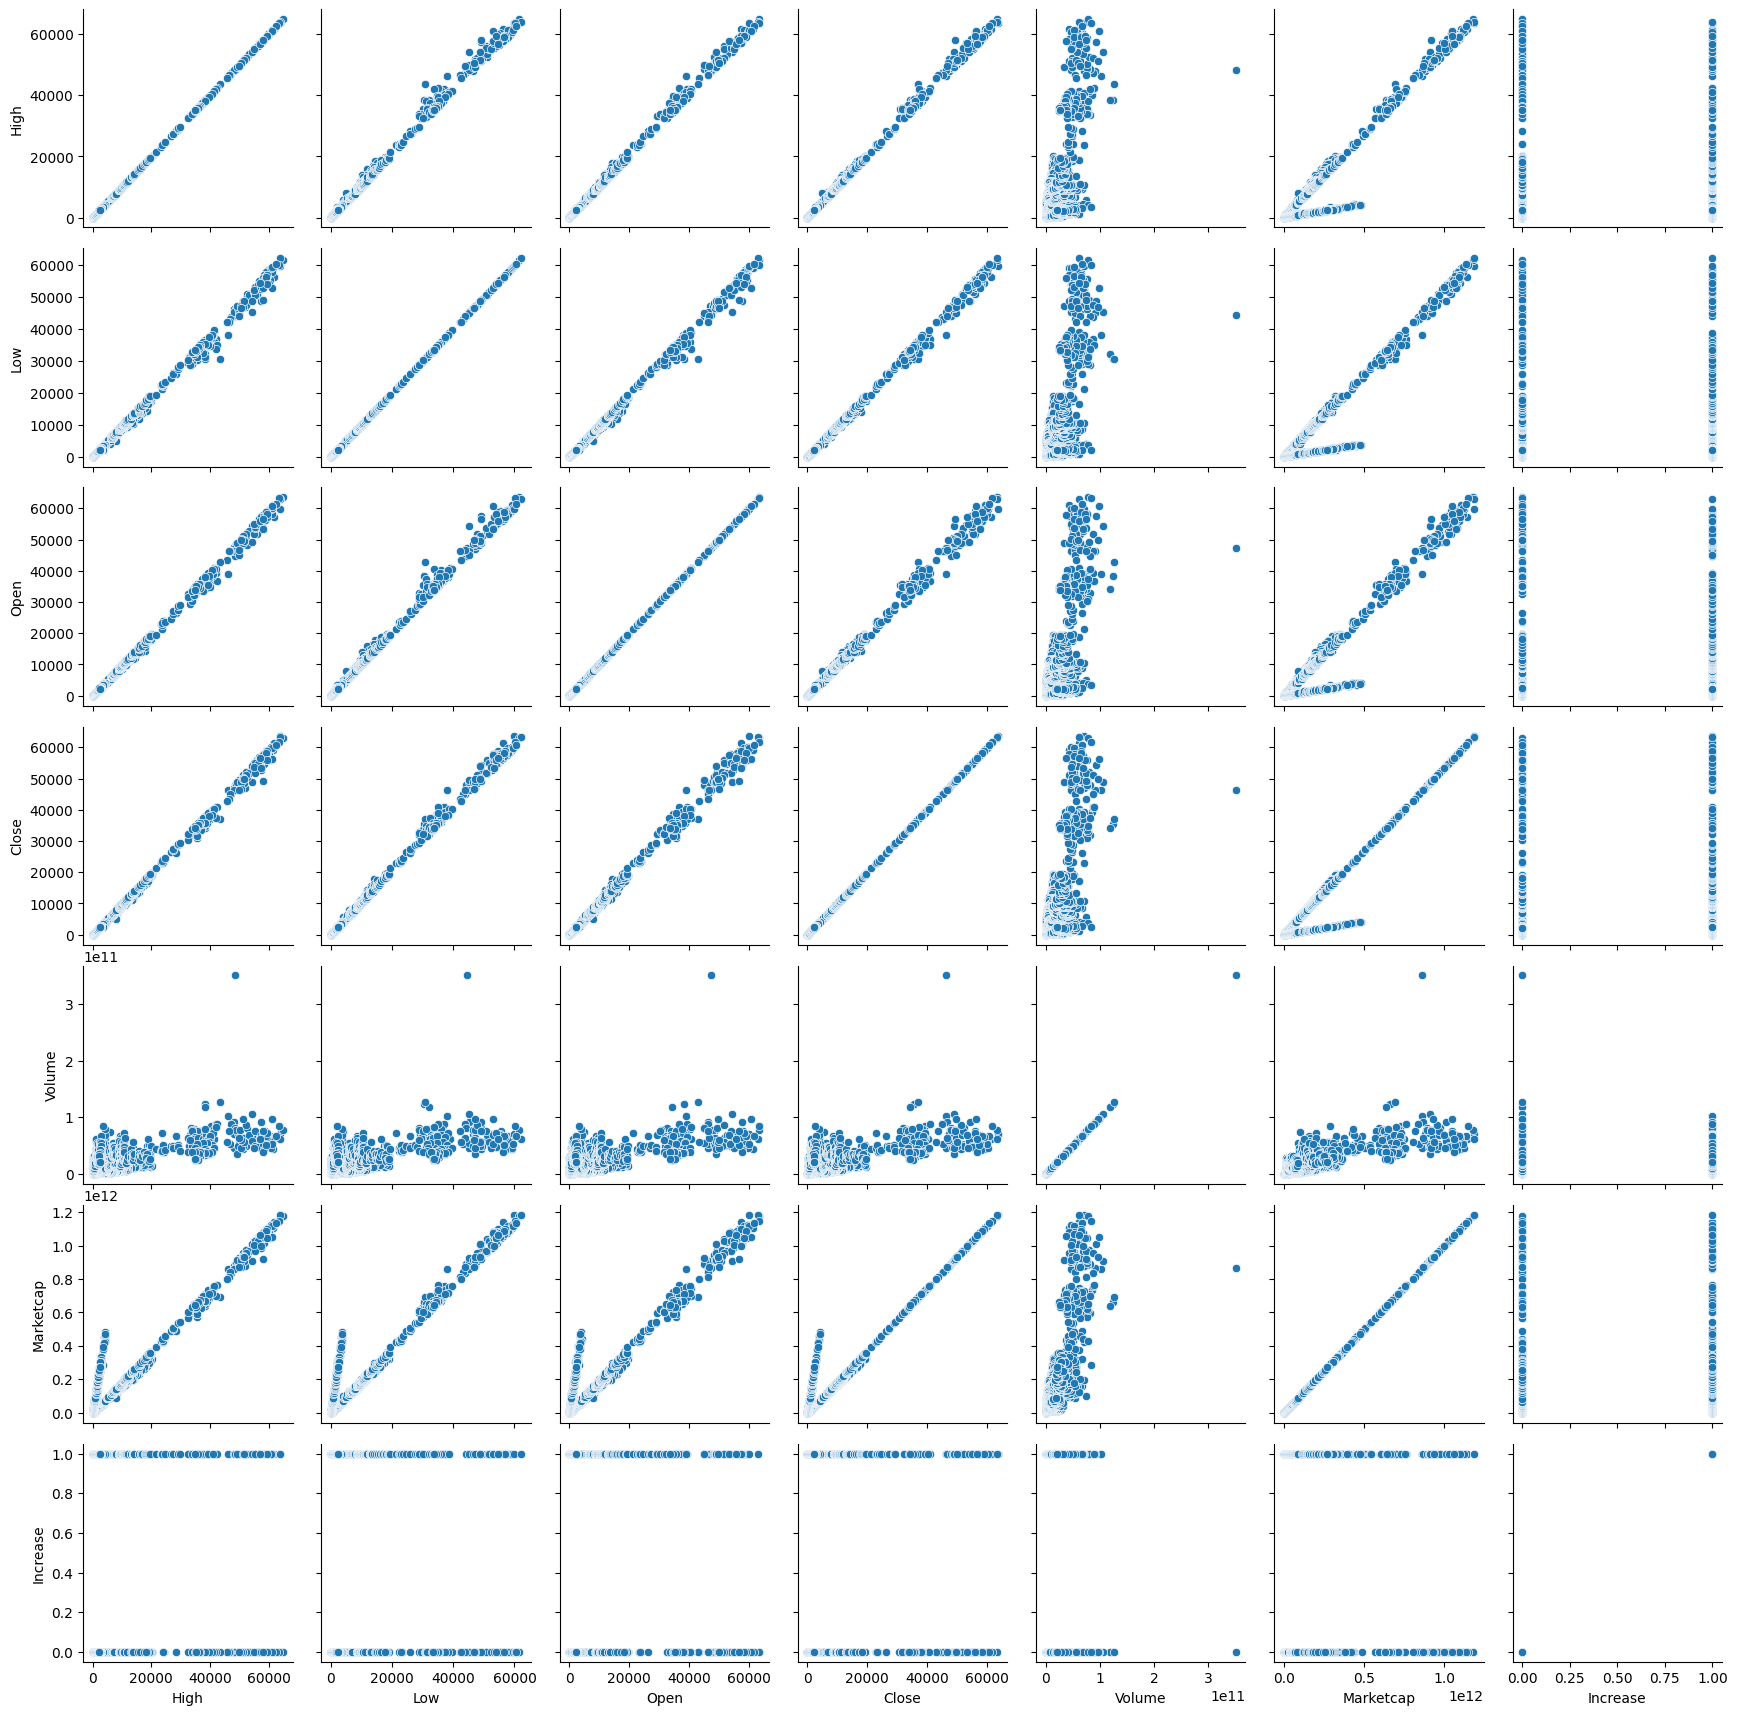

In [7]:
train_data 
train_data = train_data.drop(labels=["Change"], axis=1)
train_data


import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)


In [9]:
train_data["Date"] = df["Date"]
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Date
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,2013-04-29 23:59:59
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,2013-04-30 23:59:59
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,2013-05-01 23:59:59
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,2013-05-02 23:59:59
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,2013-05-03 23:59:59
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,2021-07-02 23:59:59
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,2021-07-03 23:59:59
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,2021-07-04 23:59:59
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,2021-07-05 23:59:59


In [10]:
# lazy, it should be a datetime frs it was a string just filter out those 2021
test_data = train_data[train_data["Date"].str.contains("2021")]
X = train_data[~train_data["Date"].str.contains("2021")]

print(test_data)
print(X)

              High           Low          Open         Close        Volume  \
2804  29600.626950  28803.585014  28994.008916  29374.151889  4.073030e+10   
2805  33155.118819  29091.181191  29376.455834  32127.267939  6.786542e+10   
2806  34608.556738  32052.317076  32129.407356  32782.024466  7.866524e+10   
2807  33440.218569  28722.755271  32810.947644  31971.913522  8.116348e+10   
2808  34437.590592  30221.186739  31977.041132  33992.429344  6.754732e+10   
...            ...           ...           ...           ...           ...   
2155   2155.596496   2021.824808   2109.892677   2150.040364  3.179621e+10   
2156   2237.567155   2117.590013   2150.835025   2226.114282  1.743336e+10   
2157   2384.286857   2190.837703   2226.550382   2321.724112  1.878711e+10   
2158   2321.922836   2163.041394   2321.922836   2198.582464  2.010379e+10   
2159   2346.294874   2197.919385   2197.919385   2324.679449  2.089186e+10   

         Marketcap  Increase                 Date  
2804  5.460

In [11]:
X_y = X["Increase"]

X = X.drop(labels=["Increase","Date",], axis=1)

test_y = test_data["Increase"]
test_data = test_data.drop(labels=["Increase", "Date",], axis=1)

X_y

0       1
1       0
2       0
3       0
4       0
       ..
1968    1
1969    1
1970    1
1971    1
1972    0
Name: Increase, Length: 4777, dtype: int32

In [12]:
# more metrics https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

svm_clf = svm.SVC(C=1, gamma="scale", random_state=0) #default kernel="rbf"
svm_clf.fit(X, X_y)

svm_clf.score(test_data, test_y)

0.5320855614973262

In [13]:
print(list(test_y))
print(list(svm_clf.predict(test_data)))

[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 

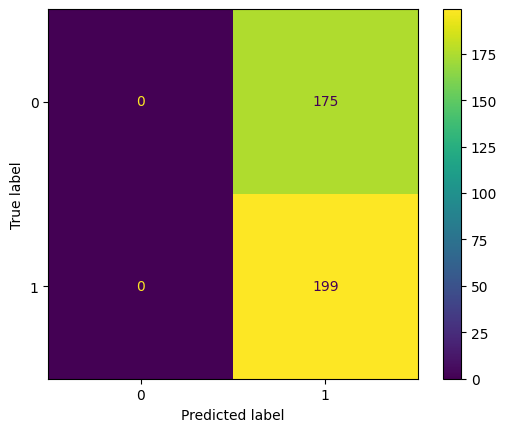

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_mtx(model, Y, predict):
    disp = ConfusionMatrixDisplay.from_predictions(
        Y,
        predict,
    )
    plt.show()
    
confusion_mtx(svm_clf, test_y, svm_clf.predict(test_data))

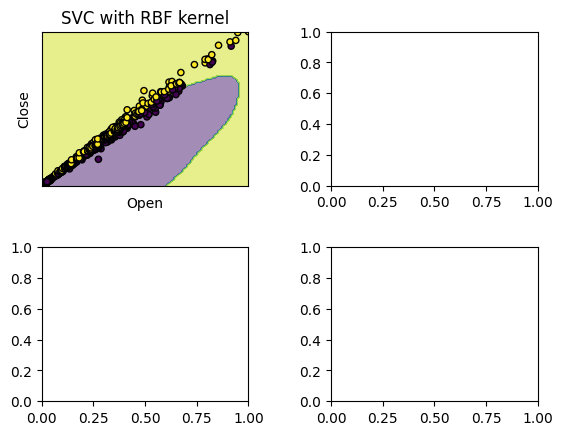

In [15]:
# https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
# https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html for LinearSVC
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay



HEADERS = ["Open", "Close"]
_X = np.array(X.loc[:, HEADERS]).reshape(-1, len(HEADERS))
_Y = X_y.copy()
_Y = _Y.to_numpy()
# _X = _X[:,0:2] # take first two features


def plot_2d_svm_gg(clf, title, X, Y, headers):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    
    xx = np.linspace(0, 12)
    yy = a * xx - clf.intercept_[0] / w[1]
    y_neg = a * xx - clf.intercept_[0] / w[1] + 1
    y_pos = a * xx - clf.intercept_[0] / w[1] - 1
    plt.figure(1, figsize = (15, 10))
    plt.plot(xx, yy, 'k',
         label=f"Decision Boundary (y ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
    plt.plot(xx, y_neg, 'b-.',
             label=f"Neg Decision Boundary (-1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
    plt.plot(xx, y_pos, 'r-.',
             label=f"Pos Decision Boundary (1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
    
    for i in range(len(Y)):
      if (Y[i]==0):
          plt.scatter(X[i][0], X[i][1],color='red', marker='o', label='negative')
      else:
          plt.scatter(X[i][0], X[i][1],color='green', marker='x', label='positive')
            
    # plt.legend()
    plt.show()
    
    # calculate margin
    print(f'Margin : {2.0 /np.sqrt(np.sum(clf.coef_ ** 2)) }')


def plot_2d_svm(model, title, X,  Y, headers):
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    
    for clf, title, ax, in zip([model,], [title,], sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            alpha=0.5,
            ax=ax,
            xlabel=headers[0],
            ylabel=headers[1],
        )
        ax.scatter(X0, X1, c=Y, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        plt.show()

model = svm.SVC(C=1, gamma="scale", random_state=0) #default kernel="rbf"
model.fit(_X, _Y)

plot_2d_svm(model, "SVC with RBF kernel", _X, _Y, HEADERS)


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

test_scale = scale.transform(test_data)

st_clf = svm.SVC(C=1, gamma="scale", random_state=0)
st_clf.fit(X_scale, X_y)
st_clf.score(test_scale, test_y)

0.5320855614973262

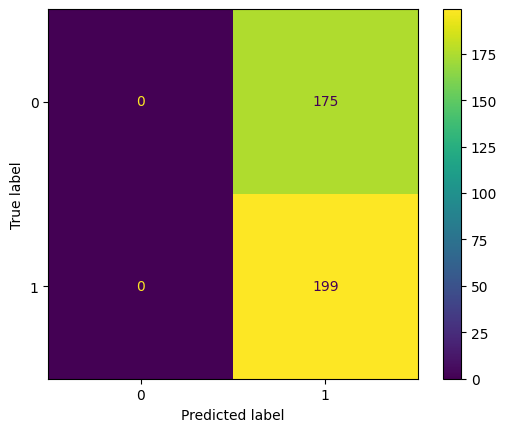

In [17]:
confusion_mtx(svm_clf, test_y, st_clf.predict(test_scale))

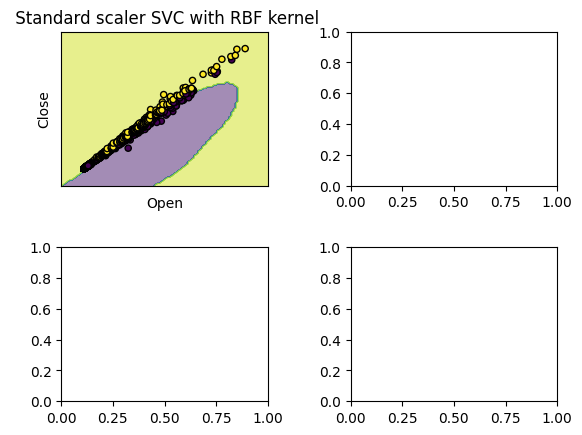

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(_X)
_X_scale = scale.transform(_X)

model = svm.SVC(C=1, gamma="scale", random_state=0)
model.fit(_X_scale, _Y)

plot_2d_svm(model, " Standard scaler SVC with RBF kernel",  _X_scale, _Y, HEADERS)

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
# run kernel="linear"
from sklearn import svm

svml_clf = svm.LinearSVC(C=1, random_state=0,) #max_iter=1000000 # so 1mil iter still convergence warning... seems need a data scaling
svml_clf.fit(X, X_y)

svml_clf.score(test_data, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5320855614973262

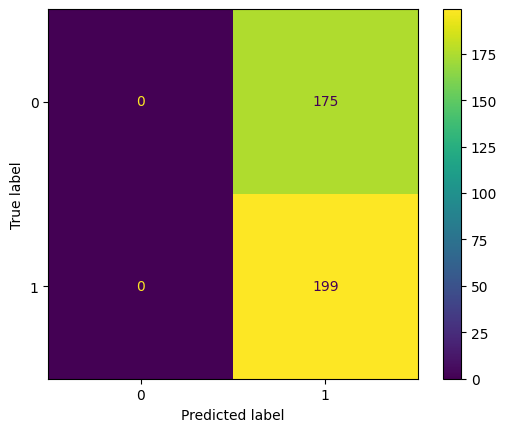

In [20]:
confusion_mtx(svm_clf, test_y, svml_clf.predict(test_data))

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


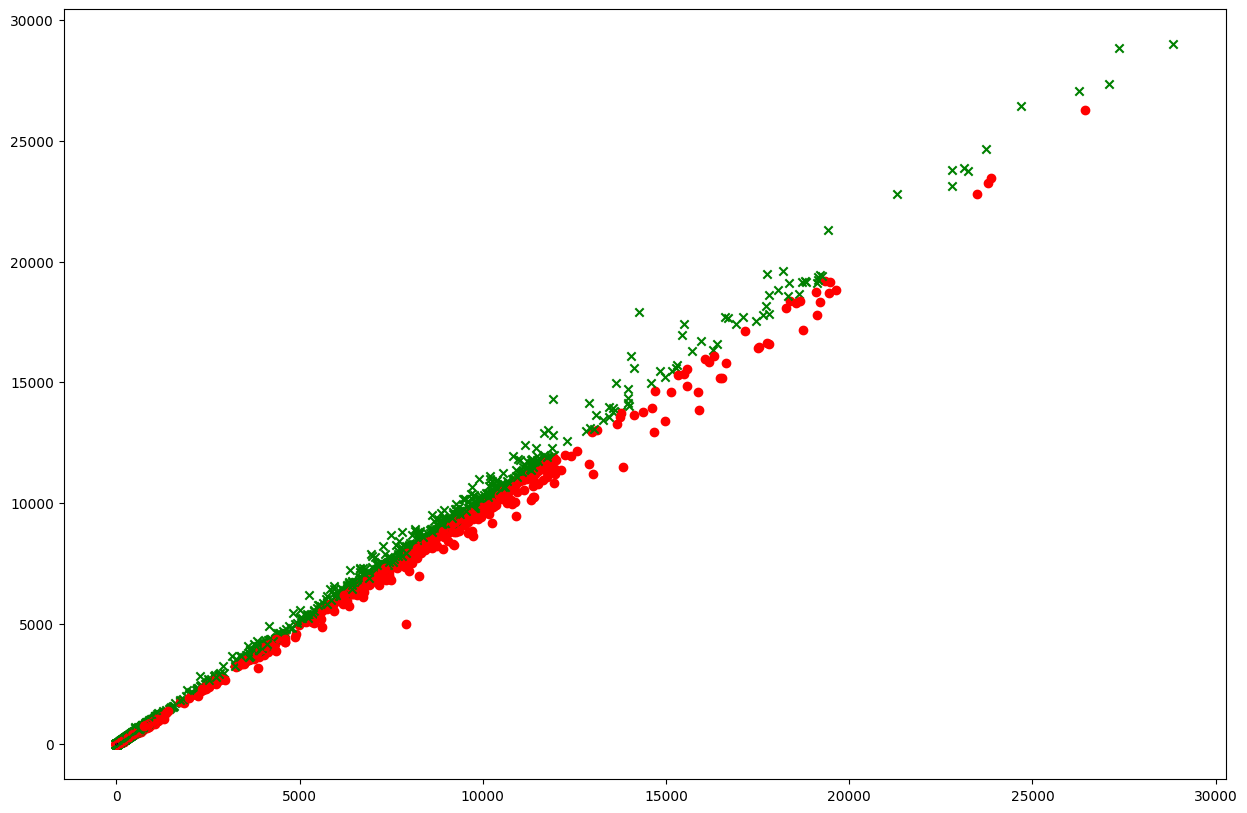

Margin : 0.2132470854647608


In [21]:
model =  svm.LinearSVC(C=1, random_state=0, ) # max_iter=1000000
model.fit(_X, _Y)

plot_2d_svm_gg(model, " Linear SVC",  _X, _Y, HEADERS)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)
test_scale = scale.transform(test_data)

st_svml_clf = svm.LinearSVC(C=1, random_state=0,) #  max_iter=10000
st_svml_clf.fit(X_scale, X_y)
st_svml_clf.score(test_scale, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9117647058823529

In [23]:
print(list(test_y))
print(list(st_svml_clf.predict(test_scale)))

[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 

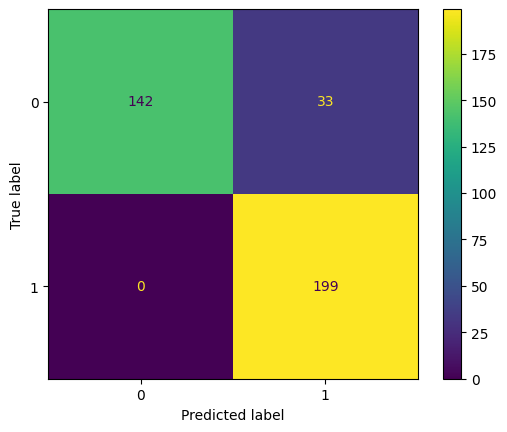

In [24]:
confusion_mtx(svm_clf, test_y, st_svml_clf.predict(test_scale))

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


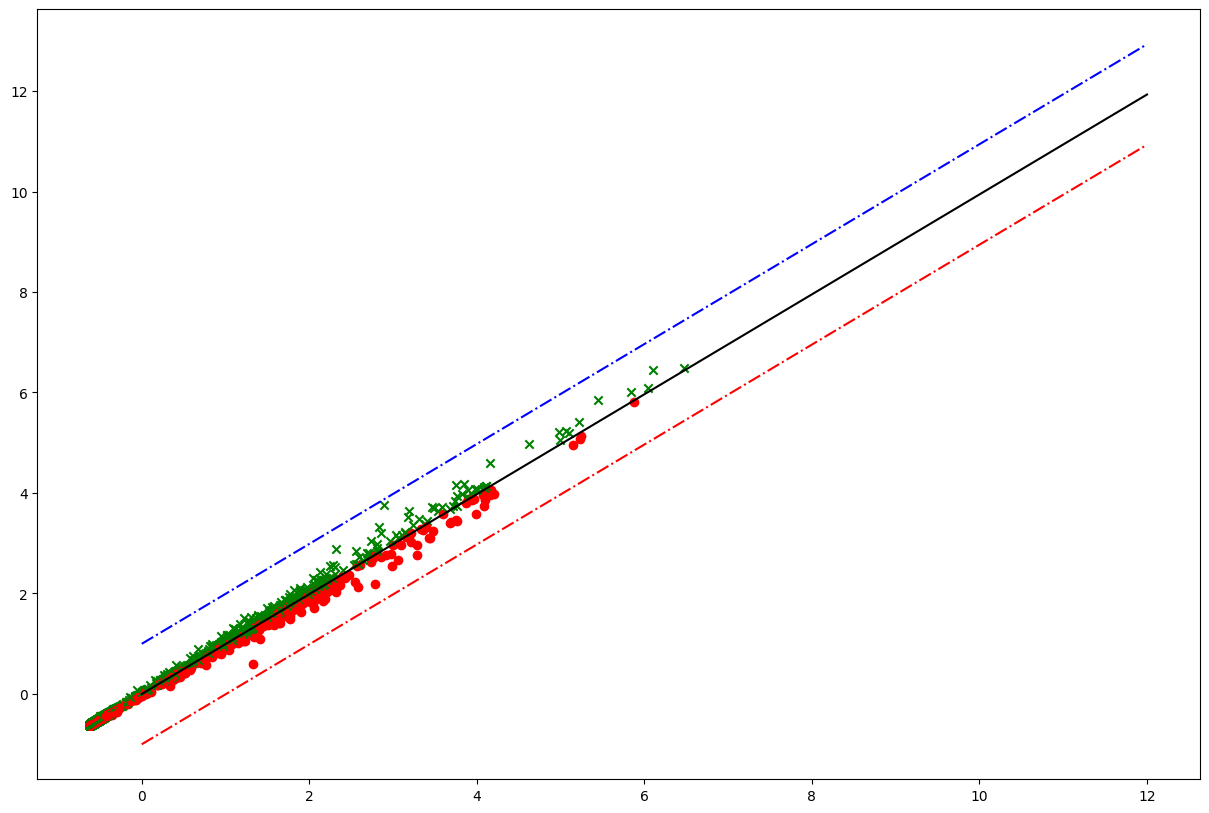

Margin : 0.08772258847975196


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(_X)
_X_scale = scale.transform(_X)

model = svm.LinearSVC(C=1, random_state=0,) #  max_iter=10000
model.fit(_X_scale, _Y)

plot_2d_svm_gg(model, " Standard scaler Linear",  _X_scale, _Y, HEADERS)

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

rdc_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=None) # max_depth=None # for graphic display later min to 10 but for accuracy go to None
rdc_clf.fit(X, X_y)

rdc_clf.score(test_data, test_y)

0.5481283422459893

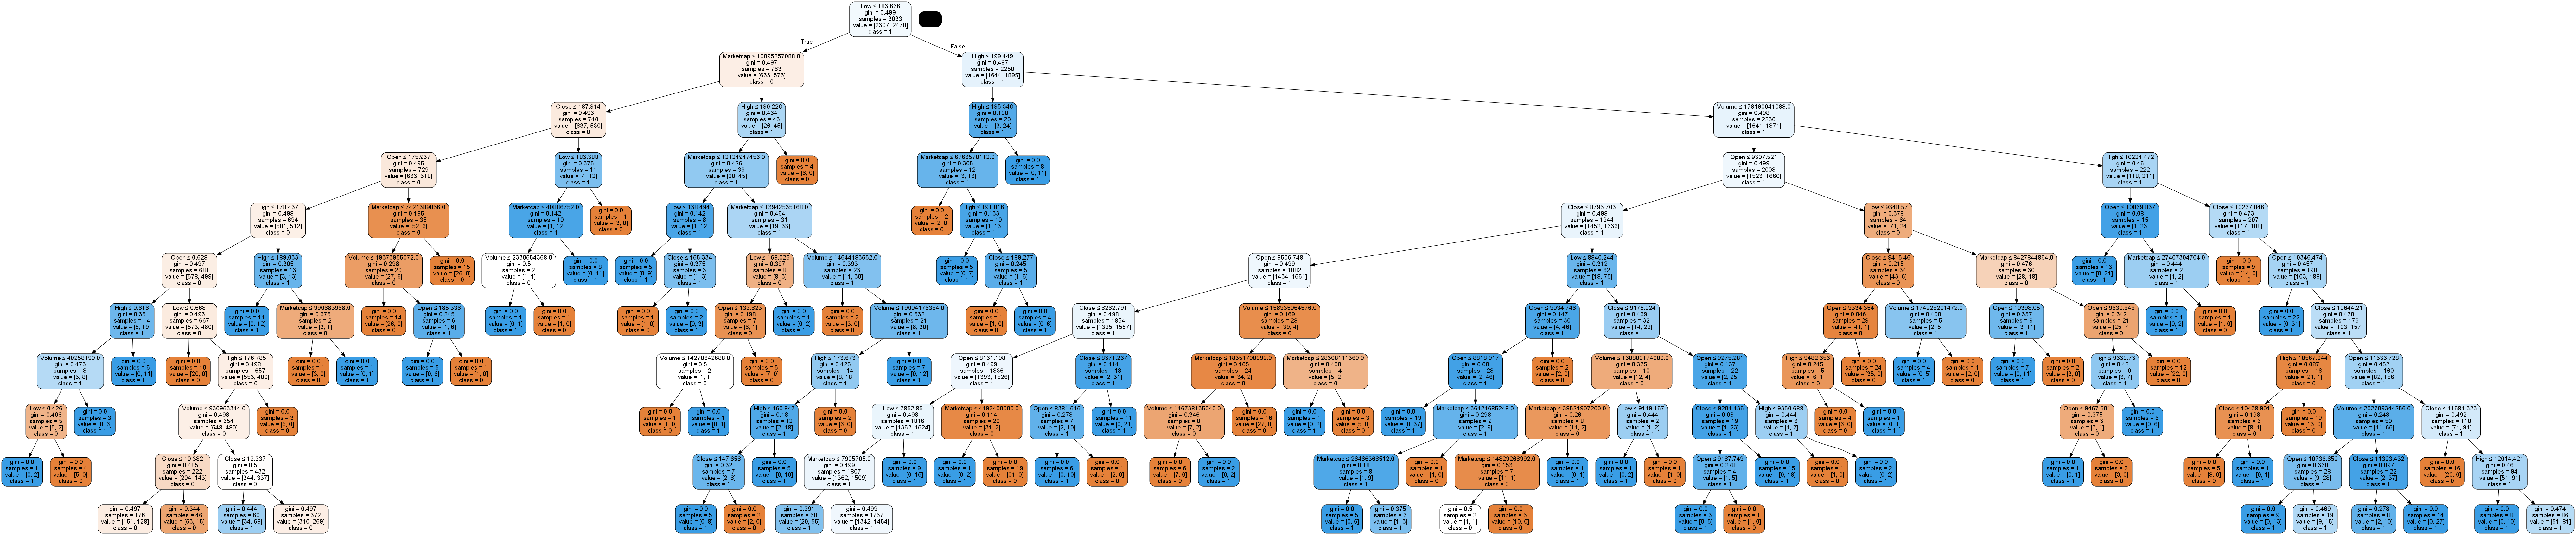

In [27]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

dot_data = StringIO()

model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10)
model.fit(X, X_y)
model.score(test_data, test_y)
estimator = model.estimators_[5]
export_graphviz(estimator, out_file=dot_data, 
                feature_names = ["High", "Low", "Open", "Close", "Marketcap", "Volume"],
                class_names = ["0", "1"],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")

Image(graph.create_png())

In [62]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=15, weights="uniform", algorithm="auto")
neigh.fit(X, X_y)

neigh.score(test_data, test_y)

0.5187165775401069

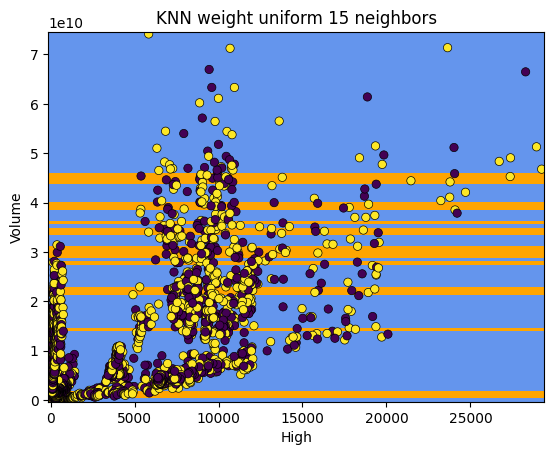

In [63]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import neighbors, datasets

# iris = datasets.load_iris()
# raise Exception(iris.target_names[iris.target])

def plot_knn(model, title, X, Y, headers):
    # Create color maps
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkorange", "c", "darkblue"]
    # label = np.array([0, 1])

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=headers[0],
        ylabel=headers[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        c=Y,
        # hue=label[Y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(title)
    plt.show()

model = KNeighborsClassifier(n_neighbors=15, weights="uniform", algorithm="auto")
model.fit(_X, _Y)

plot_knn(model, "KNN weight uniform 15 neighbors", _X, _Y, HEADERS)

In [64]:
e_clf = VotingClassifier(
    estimators= [
        ('svc', svm_clf),
        ('rand_forest', rdc_clf),
    ],
)
e_clf = e_clf.fit(X, X_y)
e_clf.score(test_data, test_y)

0.5481283422459893

In [44]:
weights = []

for est, name in zip(e_clf.estimators_, e_clf.estimators):
    score = est.score(test_data, test_y)
    print(name[0], score) # rate
    weights.append((100/(10-(score*10))))
print("Weights = ", weights)

svc 0.5320855614973262
rand_forest 0.5481283422459893
Weights =  [21.371428571428574, 22.130177514792894]


Above codes were all classifier in which proves a little use and with the data provided it was clearly in a linear path.
Yes it can be labeled disretely but it more provides toward in the uncertainty labeling side
In this cased were going in the neural network side of things and commonly use the regression and regressor.

In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X, X_y)

LinearRegression()